Model: $X = Z + \epsilon$ where $Z$ and $\epsilon$ are independent unit normal. \
Then $p(x|z) \approx \mathcal{N}(z, 1)$ and $q(z|x) \approx \mathcal{N}(x/2,1/\sqrt{2})$. \
Let's numerically verify this: 
1. Generate $M$ value pairs for $(X,Z)$ where $X=x$ and verify that $Z$ is approximately $\mathcal{N}(x/2,1/\sqrt{2})$
2. Generate $M$ value pairs for $(X,Z)$ where $Z=z$ and verify that $X$ is approximately $\mathcal{N}(z,1)$

In [67]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [44]:
def gen_fixed_z(value, num):
    eps = np.random.normal(0,1, size=num)
    return list(zip(eps +value, [value]*num))

In [92]:
def gen_fixed_x(value, num):
    z_minus_eps = np.random.normal(0,1, size=num) - np.random.normal(0,1, size=num)
    return list(zip([value]*num, z_minus_eps/2 + value/2))

In [105]:
def test_p_x_z():
    value = 2
    num = 1000000
    x_zs = gen_fixed_z(value, num)
    xs = [x for (x,z) in x_zs]
    assert(stats.jarque_bera(xs)[1] > .05)
    plt.hist(xs, bins=1000)

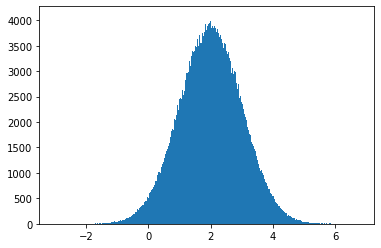

In [106]:
test_p_x_z()

In [107]:
def test_q_z_x():
    value = 2
    num = 1000000
    x_zs = gen_fixed_x(value, num)
    zs = [z for (x,z) in x_zs]
    assert(stats.jarque_bera(zs)[1] >.05)
    plt.hist(zs, bins=1000)

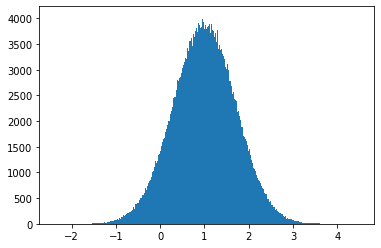

In [108]:
test_q_z_x()

In [109]:
stats.jarque_bera(np.arange(10000))

(600.0000240000007, 0.0)

In [110]:
stats.jarque_bera(np.random.normal(0,1,100000))

(0.5621870332000727, 0.7549577310987352)

$$-\frac{1}{2} \, z^{2} + \frac{{\left(a_{1} x + b_{1} - z\right)}^{2}}{2 \, \sigma_{1}^{2}} - \frac{{\left(a_{2} z + b_{2} - x\right)}^{2}}{2 \, \sigma_{2}^{2}} + \log\left(\frac{\sqrt{2}}{2 \, \sqrt{\pi}}\right) - \log\left(\frac{1}{\sigma_{1}}\right) + \log\left(\frac{1}{\sigma_{2}}\right)$$